# 32931 Technology Research Methods (SPRING 2019)
Quantitative Lab 4
(using PYTHON)

Compiled by Mahrita Harahap

# Contingency Analysis: Chi-Square Test

These questions have been taken from P. Petocz, Statistical laboratory exercises using Minitab: a guide to understanding data, Jacaranda Wiley, 1998.

Aspirin use and heart attacks
The table below reports on the relationship between aspirin use and heart attacks in the Physicians'
Health Study carried out in 1988. This double-blind study was carried out to determine whether aspirin taken regularly reduces mortality due to heart attacks.

    Fatal Attack	Non-Fatal   Attack	    No attack
    Placebo	              18	171	        10 845
    Aspirin              	5	  99	        10 933


Find the row and column percentages:

In [4]:
import pandas as pd

heart = pd.read_csv("C:/Users/mahrita/Google Drive/UTS/32931 TRM/32931 Spring 2018/Week 4/HeartAttack.csv")
heart
a=pd.crosstab(index=heart["Drug"], 
                          columns=heart["Fatal Attack"],margins=True)
a.columns = ["Attack","No attack","Non-Fatal","rowtotal"]
a.index= ["Aspirin","Placebo","coltotal"]

a

,Attack,No attack,Non-Fatal,rowtotal
Aspirin,99,10933,5,11037
Placebo,171,10845,18,11034
coltotal,270,21778,23,22071


Examine the row and column percentages, and write an informal summary of the information it tells you.

To get the proportion of counts along each column divide by the column totals:

In [82]:
#column percentages
a/a.ix["coltotal"]

,Attack,No attack,Non-Fatal,rowtotal
Aspirin,0.366667,0.50202,0.217391,0.500068
Placebo,0.633333,0.49798,0.782609,0.499932
coltotal,1.000000,1.00000,1.000000,1.000000


In [84]:
# row percentages
a.div(a["rowtotal"],axis=0)

,Attack,No attack,Non-Fatal,rowtotal
Aspirin,0.008970,0.990577,0.000453,1.0
Placebo,0.015498,0.982871,0.001631,1.0
coltotal,0.012233,0.986725,0.001042,1.0


It appears that a greater proportion of people who took aspirin did not have a heart attack
(99.1%) than those who took the placebo (98.3%).


In situations such as this, we need a method to compare proportions across all categories. The chi-square test can be used to investigate the association between the row and column variables. Carry out a chi-square test to investigate the association between aspirin use and heart attacks. State your null and alternative hypotheses, give the value of the chi-square statistic, give the p-value, decision and report your conclusion.

In [88]:
from scipy import stats
df=pd.crosstab(index=heart["Drug"], 
                          columns=heart["Fatal Attack"])
#chi Square
a,b,c,_=stats.chi2_contingency(df)
print ("Chisq =%f, p-value =%f , df = %d" %(a,b,c))

Chisq =26.903007, p-value =0.000001 , df = 2


H0: There is no association between the treatment and the outcome. <br>
H1: There is an association between the treatment and the outcome. <br>
Chi-Square Test Statistic=26.903007 <br>
P-value = 0.000001 < 0.05, so we reject the null hypothesis <br>
Therefore there is a statistically significant relationship between aspirin use and the incidence and severity of heart attacks.
 


# Regression Analysis

Brain and body weights of mammals

Is there a relationship between the brain weights and the body weights of mammals, and if so, what type of relationship? Data that can help answer this question were collected as part of a large study into sleep in mammals, and are found in Weisberg. S. 1985, Applied Linear Regression, 2nd edn, John Wiley & Sons. They show the average body weights (kg) and brain weights (g) for 62 mammals.

Retrieve the data from ‘mammals.sav’. Explain why it would be reasonable to use brain weight as the response and body weight as the predictor variable. Use plot to obtain a graph of brain weight versus body weight. What problem is apparent?



In [92]:
import pandas as pd

mammals = pd.read_csv('C:/Users/mahrita/Google Drive/32931 TRM/32931 Spring 2018/Week 4/mammals.csv')
mammals 

,Name,BrainWt,BodyWt
0,Arctic_fox,44.500,3.385
1,Owl_monkey,15.499,0.480
2,Beaver,8.100,1.350
3,Cow,423.012,464.983
4,Gray_wolf,119.498,36.328
5,Goat,114.996,27.660
6,Roe_deer,98.199,14.831
7,Guinea_pig,5.500,1.040
8,Vervet,57.998,4.190
9,Chinchilla,6.400,0.425


In [93]:
df=mammals.copy()
df.drop(['Name'], axis=1)

,BrainWt,BodyWt
0,44.500,3.385
1,15.499,0.480
2,8.100,1.350
3,423.012,464.983
4,119.498,36.328
5,114.996,27.660
6,98.199,14.831
7,5.500,1.040
8,57.998,4.190
9,6.400,0.425


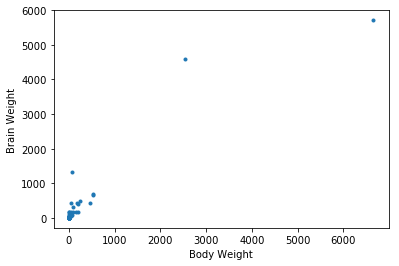

In [100]:
import matplotlib.pyplot as plt
# scatterplot
plt.plot(df['BodyWt'],df['BrainWt'], '.')
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()

For some mammals, it is going to be much easier to weigh their brains than it will be to weigh their entire body (think of an elephant). But we are interested in using an animal’s body weight to predict their brain weight- so being able to predict brain weight of live animals based on their body weight.

It appears that there are many points close to the origin (x = 0, y = 0) and a few points that are far away from the origin. These points far away from the origin will be very influential in determining the regression line (which is not good).


For  data  such  as  these,  that  are  spread  over  several  orders  of  magnitude,  a  useful transformation is the logarithm. Get the natural logarithms of body weights, Logbod. Likewise, calculate Logbrain, the natural logarithms of the brain weights. Obtain a graph of Logbrain versus Logbody. Does a linear relationship seem reasonable?

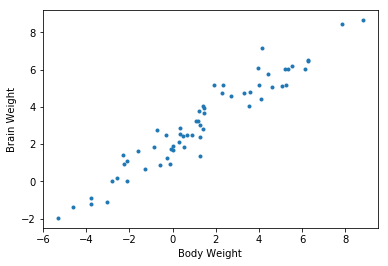

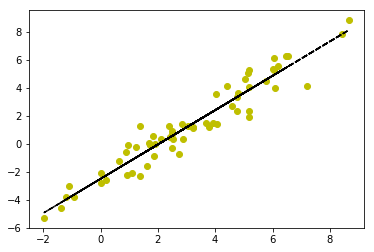

In [106]:
import numpy as np

lnbod=np.log(df['BodyWt'])
lnbrain=np.log(df['BrainWt'])
plt.plot(lnbod,lnbrain, '.')
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()

#fitting the line
fit = np.polyfit(lnbrain,lnbod,1)
fit_fn = np.poly1d(fit) 
plt.plot(lnbrain,lnbod, 'yo',lnbrain, fit_fn(lnbrain), '--k')
plt.show()
#The linear relationship is very clear, and reasonably strong.


This is much improved. The positive linear relationship is very clear, and reasonably strong.

Use lm function to obtain the least-squares regression line of Logbrain
(dependent) on Logbody (Independent). Look at the residual plots (at the end of the output). Do you think that this model fits the data well?


                            OLS Regression Results                            
Dep. Variable:                lnbrain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           9.83e-35
Time:                        12:49:35   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

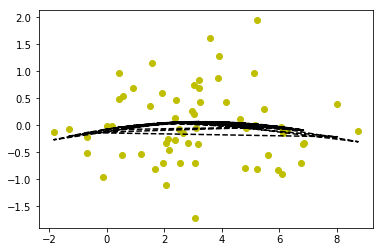

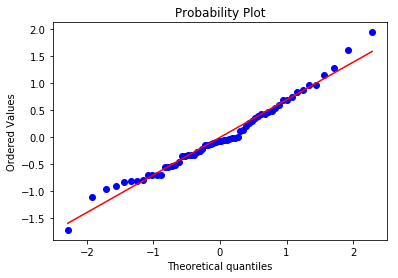

In [111]:
#Regression analysis
import patsy as ps
from statsmodels.formula.api import ols
import pylab
model = ols(formula='lnbrain~lnbod', data=df)
fitted = model.fit()
print (fitted.summary())

#Risidual plot and QQ plot
fit = np.polyfit(fitted.fittedvalues,fitted.resid,2)
fit_fn = np.poly1d(fit) 
plt.plot(fitted.fittedvalues,fitted.resid, 'yo',fitted.fittedvalues, fit_fn(fitted.fittedvalues), '--k')
plt.show()
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

Since the points in the normal probability plot seem to be close to the line, and the points on the residual vs. fits plot seem to be randomly scattered, we can say that the model fits the data well.



Using the output from previous question write down the equation of the regression line and interpret the coefficients. 

The equation of the regression line is: <br>
Log(Brain weight in g) = 2.135 + 0.752 × Log(Body weight in kg). <br>
A one unit increase in logbody weight will increase logbrain weight by an average of 0.752 units. <br>
If a mammal’s body weight was 0, then their predicted log brain weight would be on average 2.135 units. However, this interpretation of the intercept is nonsensical since it is not reasonable for the body weight of an animal to be zero.



Is there a significant relationship between the log of the brain weights and the log of the body weights?


H0: β=0 (Regression is not significant) <br>
H1: β≠0 (Regression is significant) <br>
F=697.4 <br>
P-value = 0.000 < 0.05, so we reject the null hypothesis. <br>
There is a significant relationship between the log of the mammals body weight and the log of the mammals brain weight.



Interpret the R2 and determine whether this model be appropriate for making new predictions. Explain why.

On average, 92.1% of the variation in the log body weight can be explained by the log brain weight through the regression model.

This model is appropriate for making predictions within the range of the brain weights sampled, since the regression is significant, residual plots state that model fits the data well and because R2 = 92.1% > 75%.
